<a href="https://colab.research.google.com/github/ajayostawal/MovieLens-Recommendation-Syatem/blob/main/Content_Based_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
movies = pd.read_csv("/content/movies.csv")
ratings = pd.read_csv("/content/ratings.csv")

In [3]:
df_movies = pd.DataFrame(movies)
df_ratings = pd.DataFrame(ratings)

In [4]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [7]:
df_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
df_movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [9]:
df_movies.iloc[0]['genres']

'Adventure|Animation|Children|Comedy|Fantasy'

In [10]:
df_movies['genres']

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: genres, Length: 9742, dtype: object

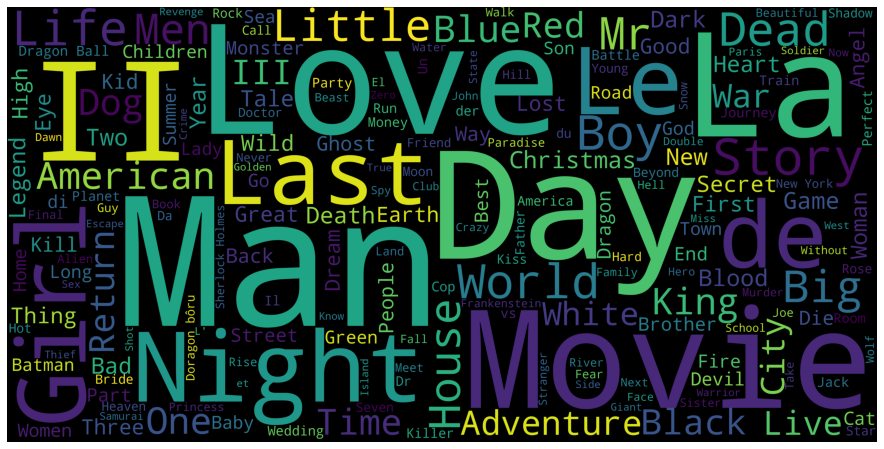

In [13]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
df_movies['title'] = df_movies['title'].fillna("").astype('str')
title_corpus = ' '.join(df_movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english')  # initialising the TF-IDF Vector object

tfidf_matrix = tfidf.fit_transform(df_movies['genres'])  # Constructing the TF-IDF Matrix (no. of movies x every word in vocabulary)
tfidf_matrix.shape

(9742, 23)

In [15]:
tfidf_matrix

<9742x23 sparse matrix of type '<class 'numpy.float64'>'
	with 23185 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)  # Constructing the Cosine Similarity Matrix (no. of movies x no. of movies)
cosine_sim.shape

(9742, 9742)

In [32]:
indices = pd.Series(df_movies.index, index = df_movies['title']).drop_duplicates()


In [33]:
def get_recommendations(title,cosine_sim = cosine_sim):
  idx = indices[title]
  
  sim_scores = list(enumerate(cosine_sim[idx]))  # Get the similarity scores of all movies wrt input movie
  sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True)
  sim_scores = sim_scores[1:11] 
  
  movie_indices = [i[0] for i in sim_scores]
  
  return df_movies['title'].iloc[movie_indices]

In [34]:
get_recommendations('Toy Story (1995)')


1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
Name: title, dtype: object